In [4]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier           
from sklearn.neighbors import KNeighborsClassifier            
from sklearn.ensemble import GradientBoostingClassifier       
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [5]:
encuesta=pd.read_csv("encuestalimpia.csv")

In [6]:
def drop_file(data,pregunta,valor):
    data = data[data[pregunta] != valor]
    return data

In [7]:
#elimino los valores ns y nc
encuesta = drop_file(encuesta,"P19",98)
encuesta = drop_file(encuesta,"P19",99)

In [8]:
variables_categoricas=["CAPITAL","CCAA","P0A","P14R","P22","P25","P26","P27","P28"]

In [9]:
encuesta2=encuesta.drop(columns=variables_categoricas)

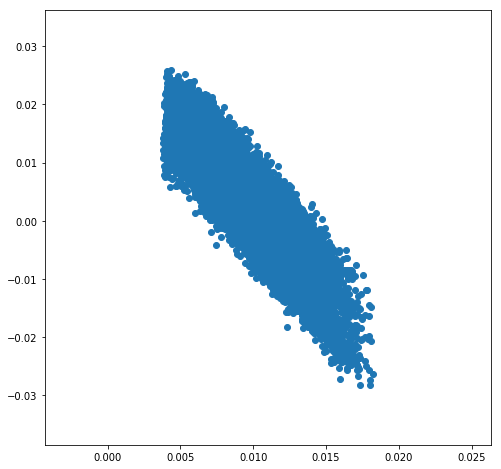

In [7]:
pca = PCA(n_components=2)
distribution_all=pca.fit(encuesta2.T) 
plt.figure(figsize=(8,8))
plt.scatter(distribution_all.components_[0], distribution_all.components_[1])

In [9]:
X=encuesta2.loc[:,encuesta2.columns!='P19']
y=encuesta2['P19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

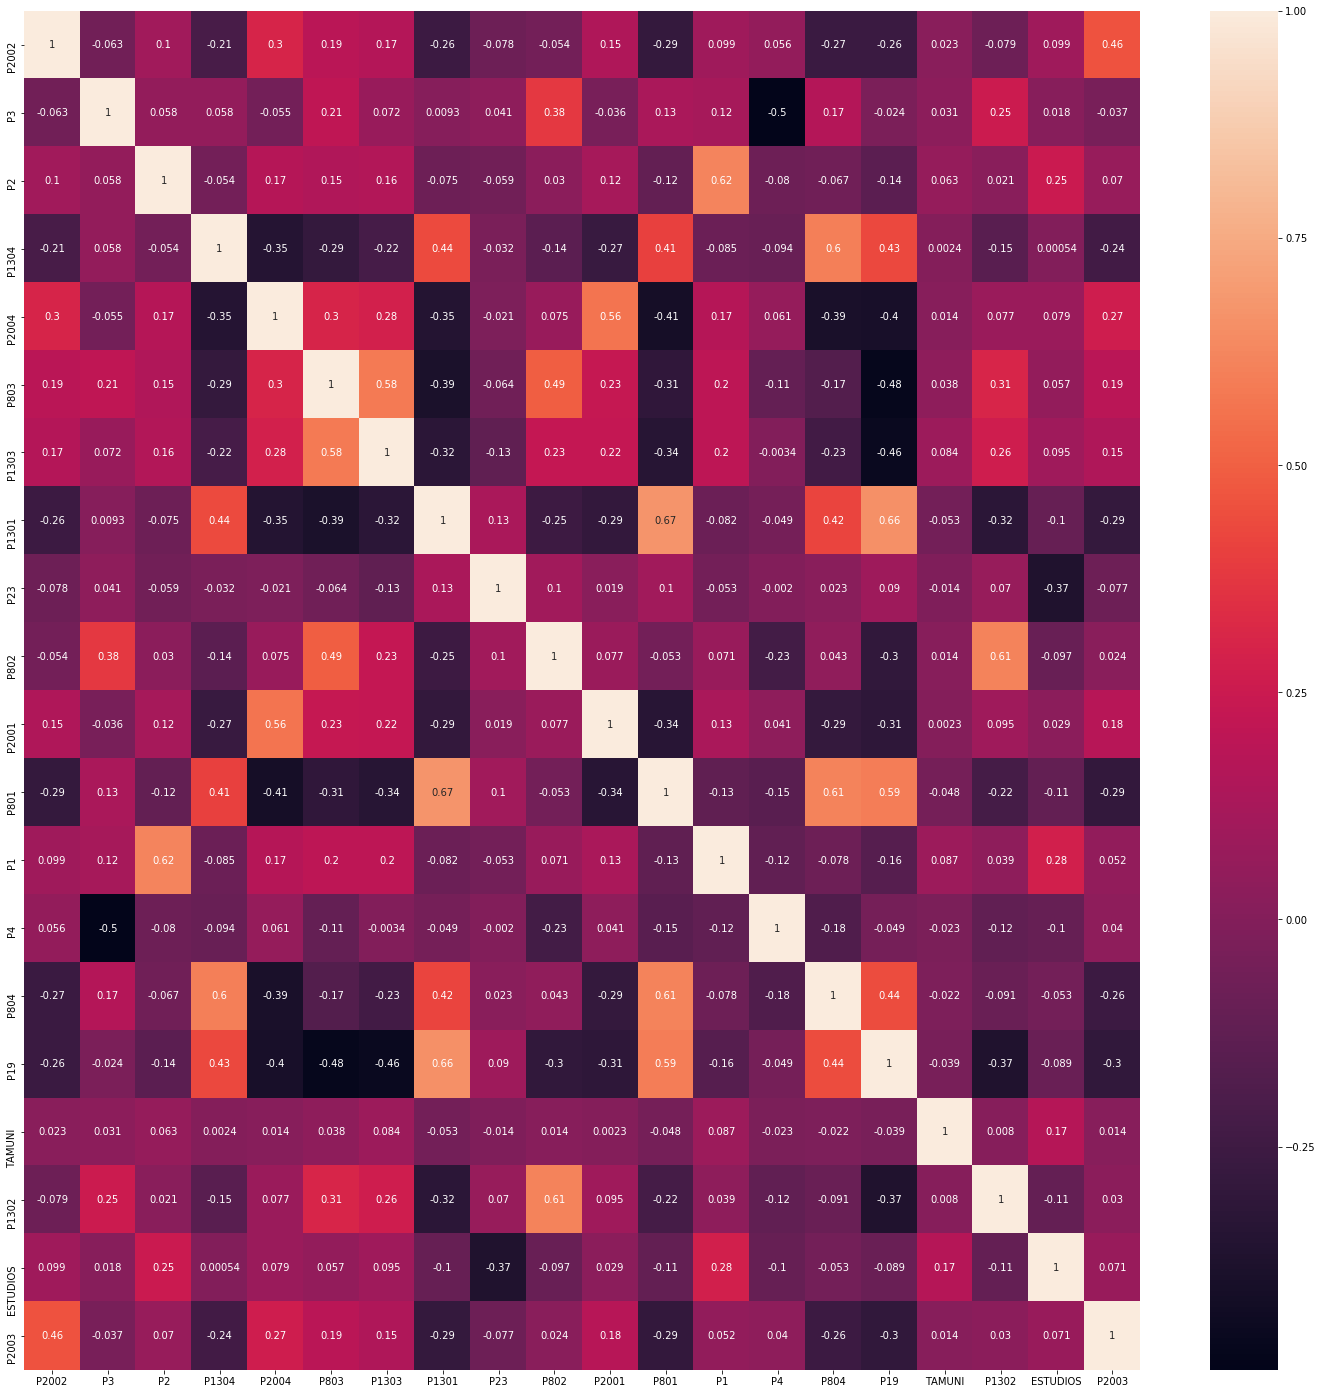

In [10]:
correlacion = encuesta2.corr()
fig, ax = plt.subplots(figsize = (25,25))
ax = sns.heatmap(correlacion, annot=True)
ax

In [11]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier           
from sklearn.neighbors import KNeighborsClassifier            
from sklearn.ensemble import GradientBoostingClassifier       
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV 
from sklearn import tree

In [12]:
lr = LogisticRegression(solver ='liblinear',max_iter=500)
#cls = svm.SVC(gamma='auto', probability=True)
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh5 = KNeighborsClassifier(n_neighbors=5)
bosque=RandomForestClassifier(n_estimators=100, criterion='gini')
tree = tree.DecisionTreeClassifier()

#entrenando
#cls.fit(X_train, y_train)
lr.fit(X_train, y_train)
neigh3.fit(X_train, y_train) 
neigh5.fit(X_train, y_train) 
bosque.fit(X_train, y_train) 
tree.fit(X_train, y_train)

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
#y_predcls = cls.predict(X_test)
y_predlr = lr.predict(X_test)
y_pred_neigh3= neigh3.predict(X_test)
y_pred_neigh5= neigh5.predict(X_test)
y_pred_bosque= bosque.predict(X_test)
y_pred_tree= tree.predict(X_test)
print("Accuracy lineal:",metrics.accuracy_score(y_test, y_predlr))
#print("Accuracy logistics:",metrics.accuracy_score(y_test, y_predlr))
print("Accuracy neigh3:",metrics.accuracy_score(y_test, y_pred_neigh3))
print("Accuracy neigh5:",metrics.accuracy_score(y_test, y_pred_neigh5))
print("Accuracy bosque:",metrics.accuracy_score(y_test, y_pred_bosque))
print("Accuracy tree:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy lineal: 0.3555082490686535
Accuracy neigh3: 0.2831293241085684
Accuracy neigh5: 0.3241085683874401
Accuracy bosque: 0.41883980840872803
Accuracy tree: 0.3139968068121341


In [14]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [10]:
results = smf.ols('P19 ~ P2002 + P3 + P2 + P1304 + P2004 + P803 + P1303 + P1301 + P23 + P802 + P2001 + P801 + P1 + P4 + P804  + TAMUNI + P1302 + ESTUDIOS + P2003', data=encuesta2).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    P19   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     683.4
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:02:23   Log-Likelihood:                -16357.
No. Observations:                9395   AIC:                         3.275e+04
Df Residuals:                    9375   BIC:                         3.290e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1066      0.188     32.567      0.0

In [11]:
encuesta_dumf=pd.get_dummies(encuesta,columns=["CAPITAL","CCAA","P0A","P14R","P22","P25","P26","P27","P28"],drop_first=False)
encuesta_dum=pd.get_dummies(encuesta,columns=["CAPITAL","CCAA","P0A","P14R","P22","P25","P26","P27","P28"],drop_first=True)

In [18]:
X=encuesta_dumf.loc[:,encuesta_dumf.columns!='P19']
y=encuesta_dumf['P19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
lr = LogisticRegression(solver ='liblinear',max_iter=500)
#cls = svm.SVC(gamma='auto', probability=True)
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh5 = KNeighborsClassifier(n_neighbors=5)
bosque=RandomForestClassifier(n_estimators=100, criterion='gini')
#tree = tree.DecisionTreeClassifier()

#entrenando
#cls.fit(X_train, y_train)
lr.fit(X_train, y_train)
neigh3.fit(X_train, y_train) 
neigh5.fit(X_train, y_train) 
bosque.fit(X_train, y_train) 
#tree.fit(X_train, y_train)

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
#y_predcls = cls.predict(X_test)
y_predlr = lr.predict(X_test)
y_pred_neigh3= neigh3.predict(X_test)
y_pred_neigh5= neigh5.predict(X_test)
y_pred_bosque= bosque.predict(X_test)
#y_pred_tree= tree.predict(X_test)
print("Accuracy lineal:",metrics.accuracy_score(y_test, y_predlr))
#print("Accuracy logistics:",metrics.accuracy_score(y_test, y_predlr))
print("Accuracy neigh3:",metrics.accuracy_score(y_test, y_pred_neigh3))
print("Accuracy neigh5:",metrics.accuracy_score(y_test, y_pred_neigh5))
print("Accuracy bosque:",metrics.accuracy_score(y_test, y_pred_bosque))
#print("Accuracy tree:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy lineal: 0.37307078233102714
Accuracy neigh3: 0.27727514635444384
Accuracy neigh5: 0.3044172432144758
Accuracy bosque: 0.4204364023416711


In [12]:
results = smf.ols('P19 ~ P2002+ P3 + P2 + P1304 + P2004 + P803 + P1303 + P1301 + P23 + P802 + P2001 + P801 + P1 + P4 + P804 + TAMUNI + P1302 + ESTUDIOS + P2003  + CAPITAL_1 + CAPITAL_2 + CAPITAL_3 + CCAA_1 + CCAA_2 +CCAA_3 + CCAA_4 + CCAA_5 + CCAA_6 + CCAA_7 + CCAA_8 + CCAA_9 + CCAA_10 + CCAA_11 + CCAA_12 + CCAA_13 + CCAA_14 + CCAA_15 + CCAA_16 + CCAA_17 + CCAA_18 + CCAA_19 + P0A_1 + P0A_2 + P14R_1 + P14R_2 + P14R_3 + P14R_4 + P14R_5 + P14R_6 + P14R_7 + P14R_8 + P14R_9 + P14R_11 +  P14R_12 + P14R_17 + P14R_18 + P14R_95 + P14R_97 + P22_1 + P22_2 + + P25_1 + P25_2 + P25_3 + P25_4 + P25_5 + P25_6 + P25_7 + + P26_1 + P26_2 + P26_3 + P26_4 + P26_5 + P26_6 + +P27_1 + P27_2 + P28_1 + P28_2 + P28_3', data=encuesta_dumf).fit()
 
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    P19   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     267.8
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:02:42   Log-Likelihood:                -15308.
No. Observations:                9395   AIC:                         3.076e+04
Df Residuals:                    9325   BIC:                         3.126e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4058      0.056     25.021      0.0

In [27]:
X=encuesta_dum.loc[:,encuesta_dum.columns!='P19']
y=encuesta_dum['P19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
def modelos(data,columnadep):
    X=data.loc[:,data.columns!= columnadep]
    y=data[columnadep]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    #modelos
    lr = LogisticRegression(solver ='liblinear',max_iter=500)
    cls = svm.SVC(gamma='auto', probability=True)
    neigh3 = KNeighborsClassifier(n_neighbors=3)
    neigh5 = KNeighborsClassifier(n_neighbors=5)
    bosque=RandomForestClassifier(n_estimators=500, criterion='gini')
    gnb = GaussianNB()
    #tree = tree.DecisionTreeClassifier()
    svc = SVC(kernel='rbf', gamma='scale')
    gbc=GradientBoostingClassifier()

    #entrenando
    cls.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    neigh3.fit(X_train, y_train) 
    neigh5.fit(X_train, y_train) 
    bosque.fit(X_train, y_train) 
    #tree.fit(X_train, y_train)
    gnb.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    gbc.fit(X_train, y_train)



    
    
    y_predlr = lr.predict(X_test)
    y_predcls = cls.predict(X_test)
    y_pred_neigh3= neigh3.predict(X_test)
    y_pred_neigh5= neigh5.predict(X_test)
    y_pred_bosque= bosque.predict(X_test)
    #y_pred_tree= tree.predict(X_test)
    y_pred_gnd = gnb.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    y_pred_gbc=gbc.predict(X_test)

    
    print("Accuracy lineal:",metrics.accuracy_score(y_test, y_predcls))
    print("Accuracy logistics:",metrics.accuracy_score(y_test, y_predlr))
    print("Accuracy neigh3:",metrics.accuracy_score(y_test, y_pred_neigh3))
    print("Accuracy neigh5:",metrics.accuracy_score(y_test, y_pred_neigh5))
    print("Accuracy bosque:",metrics.accuracy_score(y_test, y_pred_bosque))
    #print("Accuracy tree:",metrics.accuracy_score(y_test, y_pred_tree))
    print("Accuracy gnd:",metrics.accuracy_score(y_test, y_pred_gnd))
    print("Accuracy svc:",metrics.accuracy_score(y_test, y_pred_svc))
    print("Accuracy gbc:",metrics.accuracy_score(y_test, y_pred_gbc))
    


    # Your code here:
    print("matriz de confusion lineal","\n",confusion_matrix(y_test, y_predlr))
    print("matriz de confusion vecino3","\n",confusion_matrix(y_test, y_pred_neigh3))
    print("matriz de confusion vecino5","\n",confusion_matrix(y_test, y_pred_neigh5))
    print("matriz de confusion bosque","\n",confusion_matrix(y_test, y_pred_bosque))
    print("matriz de confusion gnd","\n",confusion_matrix(y_test, y_pred_gnd))
    print("matriz de confusion svc","\n",confusion_matrix(y_test, y_pred_svc))
    print("matriz de confusion gbc","\n", confusion_matrix(y_test, y_pred_gbc))
   

In [14]:
modelos(encuesta_dum,"P19")

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy lineal: 0.3746673762639702
Accuracy logistics: 0.37413517828632253
Accuracy neigh3: 0.28153273017562536
Accuracy neigh5: 0.3225119744544971
Accuracy bosque: 0.4406599254922831
Accuracy gnd: 0.12453432676955828
Accuracy svc: 0.33528472591804154
Accuracy gbc: 0.45769026077700903
matriz de confusion lineal 
 [[ 44   7  60  13  10   1   0   0   0   0]
 [ 25  13  77  18   5   0   0   0   0   0]
 [ 30  17 153  81  53   0   0   0   0   0]
 [ 14   3  88 120  77   0   2   0   0   0]
 [  7   0  35  73 216  22  22   3   1   0]
 [  2   1   1   9 116  47  32  23   0   1]
 [  1   0   6   1  49  19  61  10   1   1]
 [  0   0   1   2  28   6  42  36   5   4]
 [  0   0   0   0   6   1  16  24   1   3]
 [  0   0   0   0   1   0   8   8   4  12]]
matriz de confusion vecino3 
 [[ 39  29  42  12  11   2   0   0   0   0]
 [ 48  37  28  16   8   1   0   0   0   0]
 [ 53  76 119  55  27   3   1   0   0   0]
 [ 25  33 104  88  47   6   0   1   0   0]
 [ 15  26  65  67 141  42  13   9   1   0]
 [  6   

In [31]:
results = smf.ols('P19 ~ P2002+ P3 + P2 + P1304 + P2004 + P803 + P1303 + P1301 + P23 + P802 + P2001 + P801 + P1 + P4 + P804 + TAMUNI + P1302 + ESTUDIOS + P2003   + CAPITAL_2 + CAPITAL_3 + CCAA_2 +CCAA_3 + CCAA_4 + CCAA_5 + CCAA_6 + CCAA_7 + CCAA_8 + CCAA_9 + CCAA_10 + CCAA_11 + CCAA_12 + CCAA_13 + CCAA_14 + CCAA_15 + CCAA_16 + CCAA_17 + CCAA_18 + CCAA_19  + P0A_2  + P14R_2 + P14R_3 + P14R_4 + P14R_5 + P14R_6 + P14R_7 + P14R_8 + P14R_9 + P14R_11 +  P14R_12 + P14R_17 + P14R_18 + P14R_95 + P14R_97  + P22_2   + P25_2 + P25_3 + P25_4 + P25_5 + P25_6 + P25_7  + P26_2 + P26_3 + P26_4 + P26_5 + P26_6 + P27_2  + P28_2 + P28_3', data=encuesta_dumf).fit()
 
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    P19   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:21:19   Log-Likelihood:                -15308.
No. Observations:                9395   AIC:                         3.076e+04
Df Residuals:                    9325   BIC:                         3.126e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3432      0.213     29.846      0.0